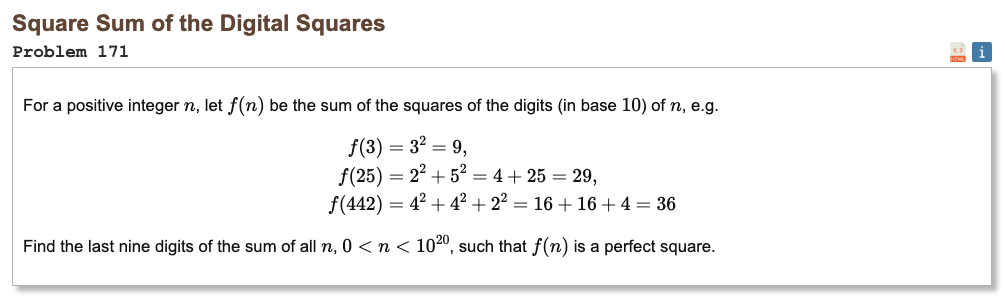

## Initial approach

* let s(n) be the sum of squared digits and we want numbers below 10^20 with s(n) a perfect square
* build numbers digit by digit with leading zeros allowed so all 20 digit strings are covered
* dynamic programming over positions tracks for each possible s the count and the total sum of formed numbers
* when adding a digit d at position p the new sum adds d^2 and the numeric sum gains d times 10^p times the old count
* the sum of valid numbers is the total over s in perfect squares up to 1620
* take results modulo 10^9 since only the last nine digits are required
* zero contributes nothing so no special subtraction is needed
* no external libraries are used

In [1]:
def solve():
    M = 10**9
    max_pos = 20
    max_s = 81 * max_pos
    cnt = [0] * (max_s + 1)
    tot = [0] * (max_s + 1)
    cnt[0] = 1
    pow10 = [1] * (max_pos + 1)
    for i in range(1, max_pos + 1):
        pow10[i] = (pow10[i - 1] * 10) % M
    for pos in range(max_pos):
        ncnt = [0] * (max_s + 1)
        ntot = [0] * (max_s + 1)
        base = pow10[pos]
        for s in range(max_s + 1):
            c = cnt[s]
            if c == 0:
                continue
            t = tot[s]
            for d in range(10):
                ns = s + d * d
                if ns <= max_s:
                    ncnt[ns] = (ncnt[ns] + c) % M
                    ntot[ns] = (ntot[ns] + t + c * d * base) % M
        cnt, tot = ncnt, ntot
    squares = {k * k for k in range(int(max_s**0.5) + 1)}
    ans = 0
    for s in range(max_s + 1):
        if s in squares:
            ans = (ans + tot[s]) % M
    return ans

result = solve()
print("Result:", result)

Result: 142989277
